In [1]:
import numpy as np
import matplotlib
import wordcloud
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

from nltk.tokenize import RegexpTokenizer

# raw data set
pd.read_csv("data/mbti_1.csv").head(10)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...
6,INFJ,"'No, I can't draw on my own nails (haha). Thos..."
7,INTJ,'I tend to build up a collection of things on ...
8,INFJ,"I'm not sure, that's a good question. The dist..."
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...


In [2]:
# custom stop words list

# personality type, basic numbers as text and social media specific stop words
customStopWords = [
    "mbti", "istj", "isfj", "infj", "intj", "istp", "isfp", "infp", "intp", "estp", "esfp", "enfp", "entp", "estj", "esfj", "enfj", "entj", "istjs", "isfjs", "infjs", "intjs", "istps", "isfps", "infps", "intps", "estps", "esfps", "enfps", "entps", "estjs", "esfjs", "enfjs", "entjs", "type", "personality",
    "like", "thread", "posts", "post", "rt", "tweet", "tweets", "retweet", "retweets", "subtweet", "subtweeted", "share", "follow", "unfollow", "dm", "comment", "comments", "word", "forum", "image", "video", "quote", "quotes", "page", "pg",
    "one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten", "'"
]

# custom stop words plus wordcloud list
stopWords = customStopWords + list(wordcloud.STOPWORDS)

In [3]:
mbtiDataFrame = pd.read_csv("data/mbti_1.csv")

# clean URLs
mbtiDataFrame["posts"] = mbtiDataFrame["posts"].str.replace('http\S+|www.\S+', '', case=False)

# clean characters
mbtiDataFrame["posts"] = mbtiDataFrame["posts"].str.replace("[$|&+/.,:;=?@#<>^*()%_!-]", ' ', case=False)

# clean long pauses
mbtiDataFrame["posts"] = mbtiDataFrame["posts"].str.replace('[.]{2,}', ' ', case=False)

# clean basic numbers
mbtiDataFrame["posts"] = mbtiDataFrame["posts"].str.replace('[0-9]+', ' ', case=False)

# clean whitespace
mbtiDataFrame["posts"] = mbtiDataFrame["posts"].str.replace('\s{2,}', ' ', case=False)

# to lowercase
mbtiDataFrame["posts"] = mbtiDataFrame["posts"].str.lower()

mbtiDataFrame.head(10)

,type,posts
0,INFJ,' and intj moments sportscenter not top ten pl...
1,ENTP,'i'm finding the lack of me in these posts ver...
2,INTP,'good one course to which i say i know that's ...
3,INTJ,'dear intp i enjoyed our conversation the othe...
4,ENTJ,'you're fired that's another silly misconcepti...
5,INTJ,' science is not perfect no scientist claims t...
6,INFJ,'no i can't draw on my own nails haha those we...
7,INTJ,'i tend to build up a collection of things on ...
8,INFJ,i'm not sure that's a good question the distin...
9,INTP,' in this position where i have to actually le...


<AxesSubplot:title={'center':'Judging vs. Perceiving'}>

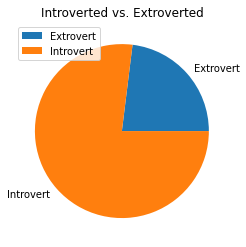

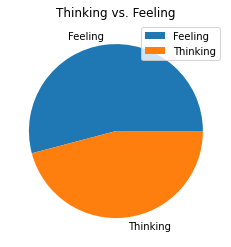

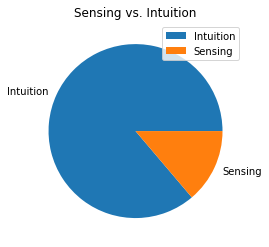

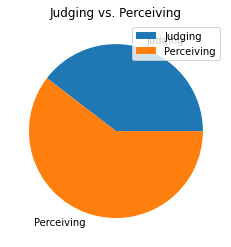

In [4]:
# how many samples are introverted vs extroverted? Add new "trait" column
dataFrameByPersonalityType = mbtiDataFrame.copy()
dataFrameByPersonalityType["trait"] = dataFrameByPersonalityType["type"].astype(str).str[0]
dataFrameByPersonalityType["traitB"] = dataFrameByPersonalityType["type"].astype(str).str[2]
dataFrameByPersonalityType["traitC"] = dataFrameByPersonalityType["type"].astype(str).str[1]
dataFrameByPersonalityType["traitD"] = dataFrameByPersonalityType["type"].astype(str).str[3]

# nicer names
dataFrameByPersonalityType["trait"] = dataFrameByPersonalityType["trait"].str.replace('([E])', 'Extrovert', case=True)
dataFrameByPersonalityType["trait"] = dataFrameByPersonalityType["trait"].str.replace('([I])', 'Introvert', case=True)
dataFrameByPersonalityType["traitB"] = dataFrameByPersonalityType["traitB"].str.replace('([T])', 'Thinking', case=True)
dataFrameByPersonalityType["traitB"] = dataFrameByPersonalityType["traitB"].str.replace('([F])', 'Feeling',  case=True)
dataFrameByPersonalityType["traitC"] = dataFrameByPersonalityType["traitC"].str.replace('([S])', 'Sensing', case=True)
dataFrameByPersonalityType["traitC"] = dataFrameByPersonalityType["traitC"].str.replace('([N])', 'Intuition',  case=True)
dataFrameByPersonalityType["traitD"] = dataFrameByPersonalityType["traitD"].str.replace('([J])', 'Judging', case=True)
dataFrameByPersonalityType["traitD"] = dataFrameByPersonalityType["traitD"].str.replace('([P])', 'Perceiving',  case=True)

# group by trait
dataFrameByPersonalityTypePie = dataFrameByPersonalityType.groupby("trait").count().filter(items=["trait", "posts"])

# group by trait B
dataFrameByPersonalityTypeBPie = dataFrameByPersonalityType.groupby("traitB").count().filter(items=["traitB", "posts"])

# group by trait C
dataFrameByPersonalityTypeCPie = dataFrameByPersonalityType.groupby("traitC").count().filter(items=["traitC", "posts"])

# group by trait D
dataFrameByPersonalityTypeDPie = dataFrameByPersonalityType.groupby("traitD").count().filter(items=["traitD", "posts"])

# display as a pie charts (>^-^<)
dataFrameByPersonalityTypePie.plot.pie(y="posts", title="Introverted vs. Extroverted", ylabel="")
dataFrameByPersonalityTypeBPie.plot.pie(y="posts", title="Thinking vs. Feeling", ylabel="")
dataFrameByPersonalityTypeCPie.plot.pie(y="posts", title="Sensing vs. Intuition", ylabel="")
dataFrameByPersonalityTypeDPie.plot.pie(y="posts", title="Judging vs. Perceiving", ylabel="")

In [5]:
dataFrameByPersonalityType

,type,posts,trait,traitB,traitC,traitD
0,INFJ,' and intj moments sportscenter not top ten pl...,Introvert,Feeling,Intuition,Judging
1,ENTP,'i'm finding the lack of me in these posts ver...,Extrovert,Thinking,Intuition,Perceiving
2,INTP,'good one course to which i say i know that's ...,Introvert,Thinking,Intuition,Perceiving
3,INTJ,'dear intp i enjoyed our conversation the othe...,Introvert,Thinking,Intuition,Judging
4,ENTJ,'you're fired that's another silly misconcepti...,Extrovert,Thinking,Intuition,Judging
...,...,...,...,...,...,...
8670,ISFP,' just because i always think of cats as fi do...,Introvert,Feeling,Sensing,Perceiving
8671,ENFP,'so if this thread already exists someplace el...,Extrovert,Feeling,Intuition,Perceiving
8672,INTP,'so many questions when i do these things i wo...,Introvert,Thinking,Intuition,Perceiving
8673,INFP,'i am very conflicted right now when it comes ...,Introvert,Feeling,Intuition,Perceiving


In [6]:
# mark each sample by main personality trait (introvert/extrovert)
groupPostsDataFrame = mbtiDataFrame.copy()
groupPostsDataFrame["trait"] = groupPostsDataFrame["type"].astype(str).str[0]
groupPostsDataFrame["traitB"] = dataFrameByPersonalityType["type"].astype(str).str[2]
groupPostsDataFrame["traitC"] = dataFrameByPersonalityType["type"].astype(str).str[1]
groupPostsDataFrame["traitD"] = dataFrameByPersonalityType["type"].astype(str).str[3]

# group samples by personality trait
concatPostsDataFrame = groupPostsDataFrame.groupby(["trait"])["posts"].apply(list)

# group samples by personality trait B
concatPostsDataFrameB = groupPostsDataFrame.groupby(["traitB"])["posts"].apply(list)

# group samples by personality trait C
concatPostsDataFrameC = groupPostsDataFrame.groupby(["traitC"])["posts"].apply(list)

# group samples by personality trait D
concatPostsDataFrameD = groupPostsDataFrame.groupby(["traitD"])["posts"].apply(list)

# write to file for debugging
#concatPostsDataFrame.to_csv("data/test.csv")
#concatPostsDataFrameB.to_csv("data/testB.csv")

introvertedPosts = " ".join(concatPostsDataFrame.iloc[1])
extrovertedPosts = " ".join(concatPostsDataFrame.iloc[0])
thinkingPosts = " ".join(concatPostsDataFrameB.iloc[1])
feelingPosts = " ".join(concatPostsDataFrameB.iloc[0])
sensingPosts = " ".join(concatPostsDataFrameC.iloc[1])
intuitionPosts = " ".join(concatPostsDataFrameC.iloc[0])
judgingPosts = " ".join(concatPostsDataFrameD.iloc[0])
perceivingPosts = " ".join(concatPostsDataFrameD.iloc[1])

# generate word cloud (SLOW!)
introvertWordcloud = wordcloud.WordCloud(width = 650, height = 400, background_color = "black", min_font_size = 16).generate(introvertedPosts)
extrovertWordcloud = wordcloud.WordCloud(width = 650, height = 400, background_color = "black", min_font_size = 16).generate(extrovertedPosts)
thinkingWordcloud = wordcloud.WordCloud(width = 650, height = 400, background_color = "black", min_font_size = 16).generate(thinkingPosts)
feelingWordcloud = wordcloud.WordCloud(width = 650, height = 400, background_color = "black", min_font_size = 16).generate(feelingPosts)
sensingWordcloud = wordcloud.WordCloud(width = 650, height = 400, background_color = "black", min_font_size = 16).generate(sensingPosts)
intuitionWordcloud = wordcloud.WordCloud(width = 650, height = 400, background_color = "black", min_font_size = 16).generate(intuitionPosts)
judgingWordcloud = wordcloud.WordCloud(width = 650, height = 400, background_color = "black", min_font_size = 16).generate(judgingPosts)
perceivingWordcloud = wordcloud.WordCloud(width = 650, height = 400, background_color = "black", min_font_size = 16).generate(perceivingPosts)


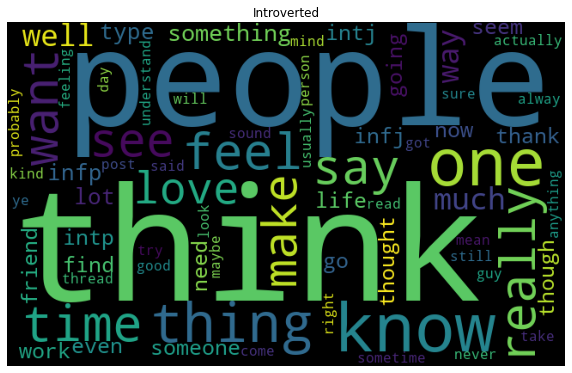

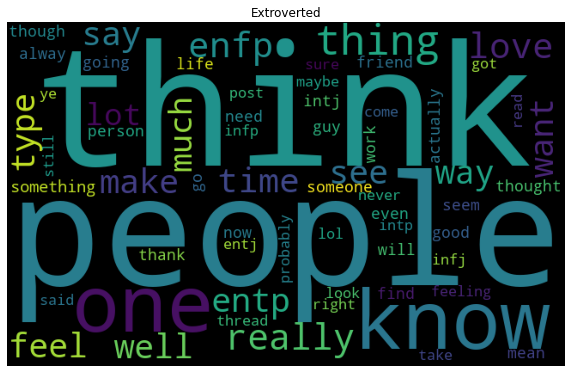

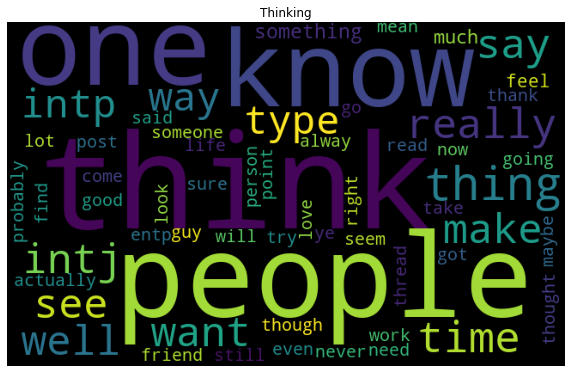

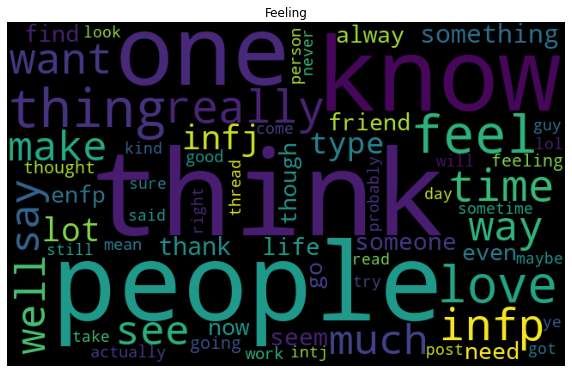

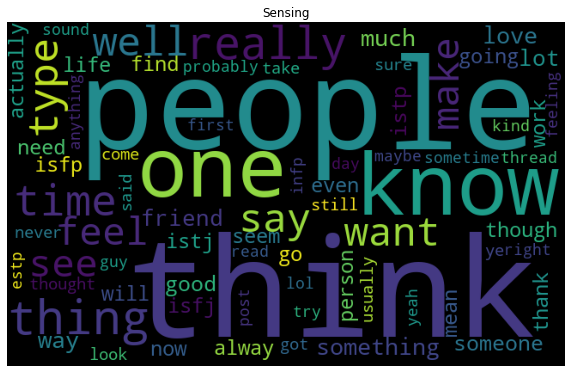

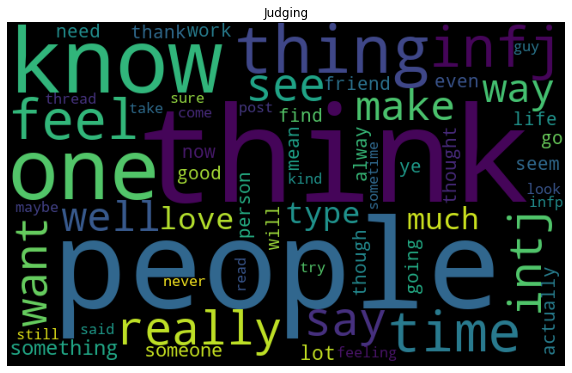

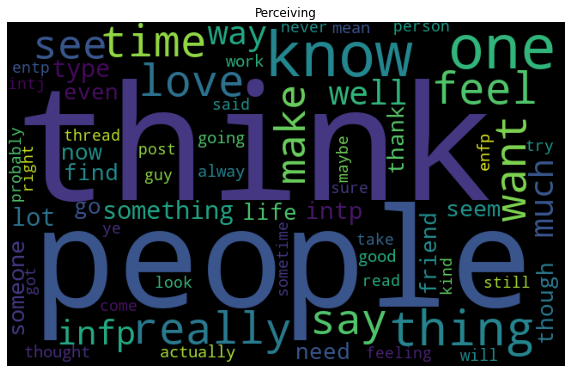

In [7]:
# display wordclouds

# introvert word cloud
matplotlib.pyplot.figure(figsize = (10, 10), facecolor = None)
matplotlib.pyplot.imshow(introvertWordcloud)
matplotlib.pyplot.axis("off")
matplotlib.pyplot.title("Introverted")

# extrovert word cloud
matplotlib.pyplot.figure(figsize = (10, 10), facecolor = None)
matplotlib.pyplot.imshow(extrovertWordcloud)
matplotlib.pyplot.axis("off")
matplotlib.pyplot.title("Extroverted")

# thinking word cloud
matplotlib.pyplot.figure(figsize = (10, 10), facecolor = None)
matplotlib.pyplot.imshow(thinkingWordcloud)
matplotlib.pyplot.axis("off")
matplotlib.pyplot.title("Thinking")

# feeling word cloud
matplotlib.pyplot.figure(figsize = (10, 10), facecolor = None)
matplotlib.pyplot.imshow(feelingWordcloud)
matplotlib.pyplot.axis("off")
matplotlib.pyplot.title("Feeling")

# sensing word cloud
matplotlib.pyplot.figure(figsize = (10, 10), facecolor = None)
matplotlib.pyplot.imshow(sensingWordcloud)
matplotlib.pyplot.axis("off")
matplotlib.pyplot.title("Sensing")

# judging word cloud
matplotlib.pyplot.figure(figsize = (10, 10), facecolor = None)
matplotlib.pyplot.imshow(judgingWordcloud)
matplotlib.pyplot.axis("off")
matplotlib.pyplot.title("Judging")

# perceiving word cloud
matplotlib.pyplot.figure(figsize = (10, 10), facecolor = None)
matplotlib.pyplot.imshow(perceivingWordcloud)
matplotlib.pyplot.axis("off")
matplotlib.pyplot.title("Perceiving")

matplotlib.pyplot.show()

In [8]:
groupPostsDataFrame.head(10)

,type,posts,trait,traitB,traitC,traitD
0,INFJ,' and intj moments sportscenter not top ten pl...,I,F,N,J
1,ENTP,'i'm finding the lack of me in these posts ver...,E,T,N,P
2,INTP,'good one course to which i say i know that's ...,I,T,N,P
3,INTJ,'dear intp i enjoyed our conversation the othe...,I,T,N,J
4,ENTJ,'you're fired that's another silly misconcepti...,E,T,N,J
5,INTJ,' science is not perfect no scientist claims t...,I,T,N,J
6,INFJ,'no i can't draw on my own nails haha those we...,I,F,N,J
7,INTJ,'i tend to build up a collection of things on ...,I,T,N,J
8,INFJ,i'm not sure that's a good question the distin...,I,F,N,J
9,INTP,' in this position where i have to actually le...,I,T,N,P


In [9]:
# generate document term matrix (bag of words)
tokenizeMethod = RegexpTokenizer(r'[a-zA-Z0-9]+')

cv = CountVectorizer(lowercase=True, stop_words=customStopWords, ngram_range = (1,1), tokenizer = tokenizeMethod.tokenize)

docTermMatrix = cv.fit_transform(groupPostsDataFrame["posts"])

docTermMatrix.toarray()

array([[17,  0,  0, ...,  0,  0,  0],
       [24,  0,  0, ...,  0,  0,  0],
       [ 8,  0,  0, ...,  0,  0,  0],
       ...,
       [32,  0,  0, ...,  0,  0,  0],
       [46,  0,  0, ...,  0,  0,  0],
       [29,  0,  0, ...,  0,  0,  0]])

In [10]:
# split into a training set and a test set for assessing model performance
X_train, X_test, y_train, y_test = train_test_split(
    docTermMatrix, groupPostsDataFrame["trait"], test_size=0.4, random_state=123)

# split B into a training set and a test set for assessing model performance
Xb_train, Xb_test, yb_train, yb_test = train_test_split(
    docTermMatrix, groupPostsDataFrame["traitB"], test_size=0.4, random_state=321)

# split C into a training set and a test set for assessing model performance
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    docTermMatrix, groupPostsDataFrame["traitC"], test_size=0.4, random_state=312)

# split D into a training set and a test set for assessing model performance
Xd_train, Xd_test, yd_train, yd_test = train_test_split(
    docTermMatrix, groupPostsDataFrame["traitD"], test_size=0.4, random_state=312)

# generate model using Multinomial Naive Bayes
textClassifier = MultinomialNB().fit(X_train, y_train)
textClassifierB = MultinomialNB().fit(Xb_train, yb_train)
textClassifierC = MultinomialNB().fit(Xc_train, yc_train)
textClassifierD = MultinomialNB().fit(Xd_train, yd_train)

In [11]:
predicted = textClassifier.predict(X_test)
print("Multinomial Naive Bayes Accuracy (I/E):", metrics.accuracy_score(y_test, predicted))

predictedB = textClassifierB.predict(Xb_test)
print("Multinomial Naive Bayes Accuracy (T/F):", metrics.accuracy_score(yb_test, predictedB))

predictedC = textClassifierC.predict(Xc_test)
print("Multinomial Naive Bayes Accuracy (N/S):", metrics.accuracy_score(yc_test, predictedC))

predictedD = textClassifierD.predict(Xd_test)
print("Multinomial Naive Bayes Accuracy (J/P):", metrics.accuracy_score(yd_test, predictedD))

Multinomial Naive Bayes Accuracy (I/E): 0.7636887608069164
Multinomial Naive Bayes Accuracy (T/F): 0.7469740634005764
Multinomial Naive Bayes Accuracy (N/S): 0.8648414985590778
Multinomial Naive Bayes Accuracy (J/P): 0.6518731988472622


In [21]:
qnaRawDataFrame = pd.read_csv("data/qna_maker.csv")
qnaDataFrame = qnaRawDataFrame["Answer"]
qnaDataFrame = qnaDataFrame.reset_index()

# clean characters
qnaDataFrame["Answer"] = qnaDataFrame["Answer"].str.replace("[$|&+/.,:;=?@#<>^*()%_!-]", ' ', case=False)

# clean long pauses
qnaDataFrame["Answer"] = qnaDataFrame["Answer"].str.replace('[.]{2,}', ' ', case=False)

# clean basic numbers
qnaDataFrame["Answer"] = qnaDataFrame["Answer"].str.replace('[0-9]+', ' ', case=False)

# clean whitespace
qnaDataFrame["Answer"] = qnaDataFrame["Answer"].str.replace('\s{2,}', ' ', case=False)

# to lowercase
qnaDataFrame["Answer"] = qnaDataFrame["Answer"].str.lower()

qnaDataFrame.head(10)

,index,Answer
0,0,swing and a miss
1,1,swing and a miss
2,2,swing and a miss
3,3,swing and a miss
4,4,swing and a miss
5,5,swing and a miss
6,6,swing and a miss
7,7,swing and a miss
8,8,swing and a miss
9,9,swing and a miss


In [27]:
# predict Introverted/Extroverted score for QnA KB

qnaSentenceCounts = cv.transform(qnaDataFrame["Answer"])

# I/E predictions
qnaPredictions = textClassifier.predict(qnaSentenceCounts)
predictedScores = textClassifier.predict_proba(qnaSentenceCounts)

# T/F predictions
qnaPredictionsB = textClassifierB.predict(qnaSentenceCounts)
predictedScoresB = textClassifierB.predict_proba(qnaSentenceCounts)

# N/S predictions
qnaPredictionsC = textClassifierC.predict(qnaSentenceCounts)
predictedScoresC = textClassifierC.predict_proba(qnaSentenceCounts)

# J/P predictions
qnaPredictionsD = textClassifierD.predict(qnaSentenceCounts)
predictedScoresD = textClassifierD.predict_proba(qnaSentenceCounts)

# helpers
joinerFunction = lambda t: "".join(str(t))
maxFunction = lambda t: np.max(t)

# I/E scores
extrovertedScores = [score[0] for score in predictedScores]
introvertedScores = [score[1] for score in predictedScores]

# T/F scores
thinkingScores = [score[1] for score in predictedScoresB]
feelingScores = [score[0] for score in predictedScoresB]

# N/S scores
intuitionScores = [score[0] for score in predictedScoresC]
sensingScores = [score[1] for score in predictedScoresC]

# J/P scores
judgingScores = [score[0] for score in predictedScoresD]
perceivingScores = [score[1] for score in predictedScoresD]

# I/E results
qnaDataFrame["predictedTrait"] = qnaPredictions
qnaDataFrame["predictedScoreI"] = introvertedScores
qnaDataFrame["predictedScoreE"] = extrovertedScores

# T/F results
qnaDataFrame["predictedTraitB"] = qnaPredictionsB
qnaDataFrame["predictedScoreT"] = thinkingScores
qnaDataFrame["predictedScoreF"] = feelingScores

# N/S results
qnaDataFrame["predictedTraitC"] = qnaPredictionsC
qnaDataFrame["predictedScoreN"] = intuitionScores
qnaDataFrame["predictedScoreS"] = sensingScores

# J/P results
qnaDataFrame["predictedTraitD"] = qnaPredictionsD
qnaDataFrame["predictedScoreJ"] = judgingScores
qnaDataFrame["predictedScoreP"] = perceivingScores

qnaDataFrame

,index,Answer,predictedTrait,predictedScoreI,predictedScoreE,predictedTraitB,predictedScoreT,predictedScoreF,predictedTraitC,predictedScoreN,predictedScoreS,predictedTraitD,predictedScoreJ,predictedScoreP
0,0,swing and a miss,I,0.740728,0.259272,F,0.417386,0.582614,N,0.871702,0.128298,P,0.428549,0.571451
1,1,swing and a miss,I,0.740728,0.259272,F,0.417386,0.582614,N,0.871702,0.128298,P,0.428549,0.571451
2,2,swing and a miss,I,0.740728,0.259272,F,0.417386,0.582614,N,0.871702,0.128298,P,0.428549,0.571451
3,3,swing and a miss,I,0.740728,0.259272,F,0.417386,0.582614,N,0.871702,0.128298,P,0.428549,0.571451
4,4,swing and a miss,I,0.740728,0.259272,F,0.417386,0.582614,N,0.871702,0.128298,P,0.428549,0.571451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9788,9788,i've heard really good things about naps,I,0.897352,0.102648,F,0.144022,0.855978,N,0.888916,0.111084,P,0.437081,0.562919
9789,9789,i've heard really good things about naps,I,0.897352,0.102648,F,0.144022,0.855978,N,0.888916,0.111084,P,0.437081,0.562919
9790,9790,i've heard really good things about naps,I,0.897352,0.102648,F,0.144022,0.855978,N,0.888916,0.111084,P,0.437081,0.562919
9791,9791,i've heard really good things about naps,I,0.897352,0.102648,F,0.144022,0.855978,N,0.888916,0.111084,P,0.437081,0.562919


<AxesSubplot:title={'center':'Judging vs. Perceiving trait'}>

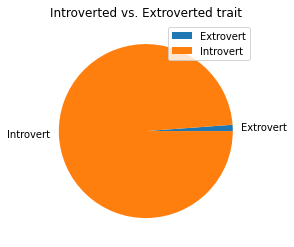

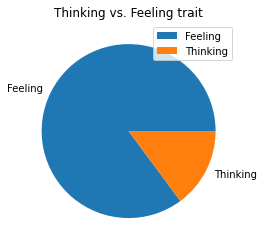

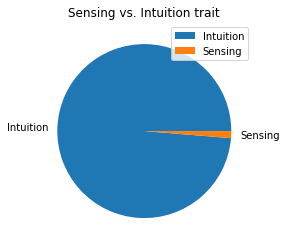

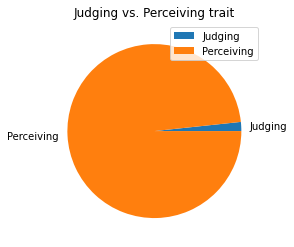

In [29]:
# group by trait
dataFramePersonalityTypePie = qnaDataFrame.groupby("predictedTrait").count().filter(items=["predictedTrait", "Answer"])
dataFramePersonalityTypePieB = qnaDataFrame.groupby("predictedTraitB").count().filter(items=["predictedTraitB", "Answer"])
dataFramePersonalityTypePieC = qnaDataFrame.groupby("predictedTraitC").count().filter(items=["predictedTraitC", "Answer"])
dataFramePersonalityTypePieD = qnaDataFrame.groupby("predictedTraitD").count().filter(items=["predictedTraitD", "Answer"])

# display as a pie chart (>^-^<)
dataFramePersonalityTypePie.plot.pie(y="Answer", title="Introverted vs. Extroverted trait", ylabel="", labels=["Extrovert", "Introvert"])
dataFramePersonalityTypePieB.plot.pie(y="Answer", title="Thinking vs. Feeling trait", ylabel="", labels=["Feeling", "Thinking"])
dataFramePersonalityTypePieC.plot.pie(y="Answer", title="Sensing vs. Intuition trait", ylabel="", labels=["Intuition", "Sensing"])
dataFramePersonalityTypePieD.plot.pie(y="Answer", title="Judging vs. Perceiving trait", ylabel="", labels=["Judging", "Perceiving"])

In [34]:
# dataframe per trait
introvertedDataFrame = qnaDataFrame.loc[qnaDataFrame["predictedTrait"] == "I"]
extrovertedDataFrame = qnaDataFrame.loc[qnaDataFrame["predictedTrait"] == "E"]
thinkingDataFrame = qnaDataFrame.loc[qnaDataFrame["predictedTraitB"] == "T"]
feelingDataFrame = qnaDataFrame.loc[qnaDataFrame["predictedTraitB"] == "F"]
sensingDataFrame = qnaDataFrame.loc[qnaDataFrame["predictedTraitC"] == "S"]
intuitionDataFrame = qnaDataFrame.loc[qnaDataFrame["predictedTraitC"] == "N"]
judgingDataFrame = qnaDataFrame.loc[qnaDataFrame["predictedTraitD"] == "J"]
perceivingDataFrame = qnaDataFrame.loc[qnaDataFrame["predictedTraitD"] == "P"]

# concatenate content for word cloud
introvertedText = " ".join(introvertedDataFrame["Answer"])
extrovertedText = " ".join(extrovertedDataFrame["Answer"])
thinkingText = " ".join(thinkingDataFrame["Answer"])
feelingText = " ".join(feelingDataFrame["Answer"])
sensingText = " ".join(sensingDataFrame["Answer"])
intuitionText = " ".join(intuitionDataFrame["Answer"])
judgingText = " ".join(judgingDataFrame["Answer"])
perceivingText = " ".join(perceivingDataFrame["Answer"])

# generate word cloud
qnaIntrovertWordcloud = wordcloud.WordCloud(stopwords = list(wordcloud.STOPWORDS), width = 400, height = 200, background_color = "black", min_font_size = 16).generate(introvertedText)
qnaExtrovertWordcloud = wordcloud.WordCloud(stopwords = list(wordcloud.STOPWORDS), width = 400, height = 200, background_color = "black", min_font_size = 16).generate(extrovertedText)
qnaThinkingWordcloud = wordcloud.WordCloud(stopwords = list(wordcloud.STOPWORDS), width = 400, height = 200, background_color = "black", min_font_size = 16).generate(thinkingText)
qnaFeelingWordcloud = wordcloud.WordCloud(stopwords = list(wordcloud.STOPWORDS), width = 400, height = 200, background_color = "black", min_font_size = 16).generate(feelingText)
qnaSensingWordcloud = wordcloud.WordCloud(stopwords = list(wordcloud.STOPWORDS), width = 400, height = 200, background_color = "black", min_font_size = 16).generate(sensingText)
qnaIntuitionWordcloud = wordcloud.WordCloud(stopwords = list(wordcloud.STOPWORDS), width = 400, height = 200, background_color = "black", min_font_size = 16).generate(intuitionText)
qnaJudgingWordcloud = wordcloud.WordCloud(stopwords = list(wordcloud.STOPWORDS), width = 400, height = 200, background_color = "black", min_font_size = 16).generate(judgingText)
qnaPerceivingWordcloud = wordcloud.WordCloud(stopwords = list(wordcloud.STOPWORDS), width = 400, height = 200, background_color = "black", min_font_size = 16).generate(perceivingText)

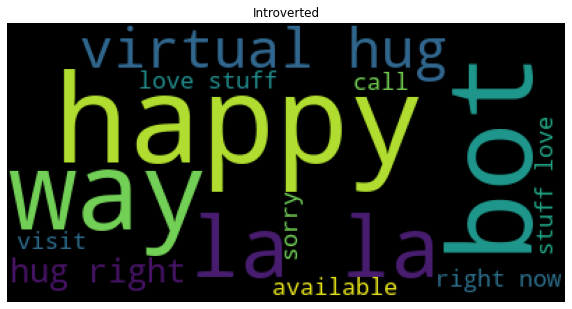

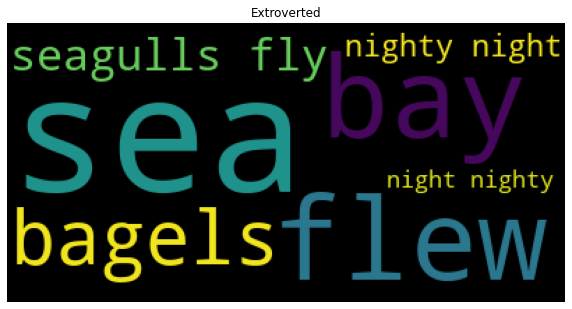

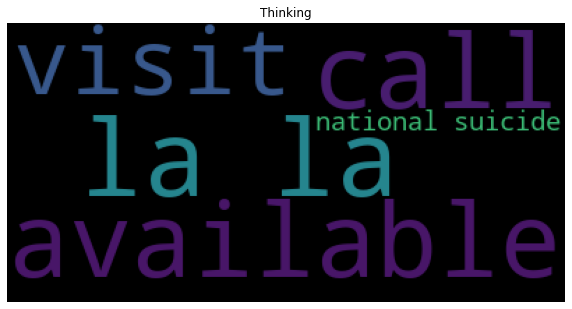

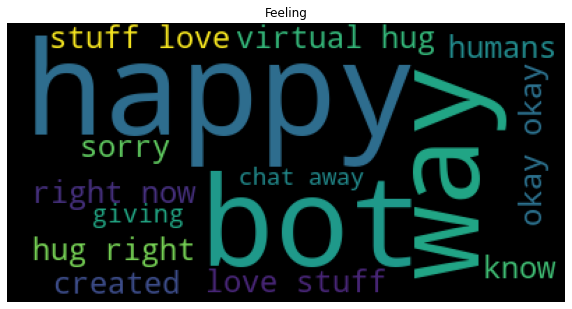

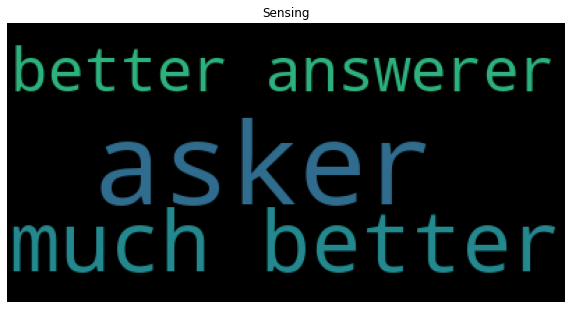

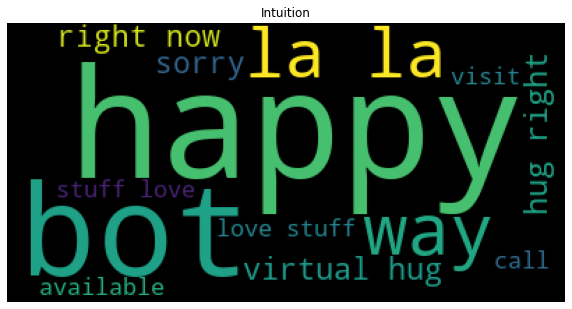

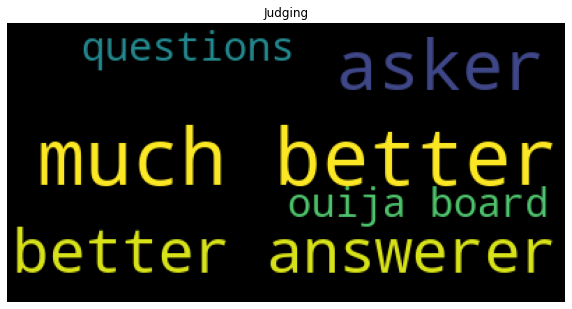

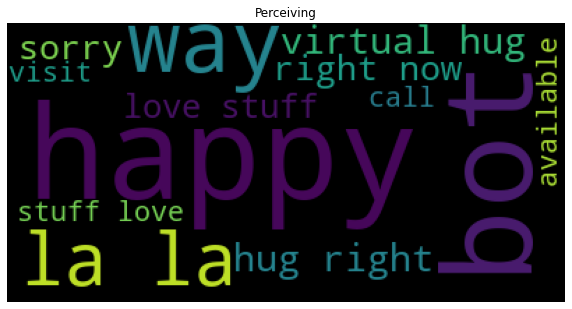

In [35]:
# display wordclouds

# introvert word cloud
matplotlib.pyplot.figure(figsize = (10, 10), facecolor = None)
matplotlib.pyplot.imshow(qnaIntrovertWordcloud)
matplotlib.pyplot.axis("off")
matplotlib.pyplot.title("Introverted")

# extrovert word cloud
matplotlib.pyplot.figure(figsize = (10, 10), facecolor = None)
matplotlib.pyplot.imshow(qnaExtrovertWordcloud)
matplotlib.pyplot.axis("off")
matplotlib.pyplot.title("Extroverted")

# thinking word cloud
matplotlib.pyplot.figure(figsize = (10, 10), facecolor = None)
matplotlib.pyplot.imshow(qnaThinkingWordcloud)
matplotlib.pyplot.axis("off")
matplotlib.pyplot.title("Thinking")

# feeling word cloud
matplotlib.pyplot.figure(figsize = (10, 10), facecolor = None)
matplotlib.pyplot.imshow(qnaFeelingWordcloud)
matplotlib.pyplot.axis("off")
matplotlib.pyplot.title("Feeling")

# sensing word cloud
matplotlib.pyplot.figure(figsize = (10, 10), facecolor = None)
matplotlib.pyplot.imshow(qnaSensingWordcloud)
matplotlib.pyplot.axis("off")
matplotlib.pyplot.title("Sensing")

# intuition word cloud
matplotlib.pyplot.figure(figsize = (10, 10), facecolor = None)
matplotlib.pyplot.imshow(qnaIntuitionWordcloud)
matplotlib.pyplot.axis("off")
matplotlib.pyplot.title("Intuition")

# judging word cloud
matplotlib.pyplot.figure(figsize = (10, 10), facecolor = None)
matplotlib.pyplot.imshow(qnaJudgingWordcloud)
matplotlib.pyplot.axis("off")
matplotlib.pyplot.title("Judging")

# perceiving word cloud
matplotlib.pyplot.figure(figsize = (10, 10), facecolor = None)
matplotlib.pyplot.imshow(qnaPerceivingWordcloud)
matplotlib.pyplot.axis("off")
matplotlib.pyplot.title("Perceiving")

matplotlib.pyplot.show()

In [36]:
qnaDataFrame
#qnaDataFrame.to_csv("data/qna-predicted.csv")

,index,Answer,predictedTrait,predictedScoreI,predictedScoreE,predictedTraitB,predictedScoreT,predictedScoreF,predictedTraitC,predictedScoreN,predictedScoreS,predictedTraitD,predictedScoreJ,predictedScoreP
0,0,swing and a miss,I,0.740728,0.259272,F,0.417386,0.582614,N,0.871702,0.128298,P,0.428549,0.571451
1,1,swing and a miss,I,0.740728,0.259272,F,0.417386,0.582614,N,0.871702,0.128298,P,0.428549,0.571451
2,2,swing and a miss,I,0.740728,0.259272,F,0.417386,0.582614,N,0.871702,0.128298,P,0.428549,0.571451
3,3,swing and a miss,I,0.740728,0.259272,F,0.417386,0.582614,N,0.871702,0.128298,P,0.428549,0.571451
4,4,swing and a miss,I,0.740728,0.259272,F,0.417386,0.582614,N,0.871702,0.128298,P,0.428549,0.571451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9788,9788,i've heard really good things about naps,I,0.897352,0.102648,F,0.144022,0.855978,N,0.888916,0.111084,P,0.437081,0.562919
9789,9789,i've heard really good things about naps,I,0.897352,0.102648,F,0.144022,0.855978,N,0.888916,0.111084,P,0.437081,0.562919
9790,9790,i've heard really good things about naps,I,0.897352,0.102648,F,0.144022,0.855978,N,0.888916,0.111084,P,0.437081,0.562919
9791,9791,i've heard really good things about naps,I,0.897352,0.102648,F,0.144022,0.855978,N,0.888916,0.111084,P,0.437081,0.562919


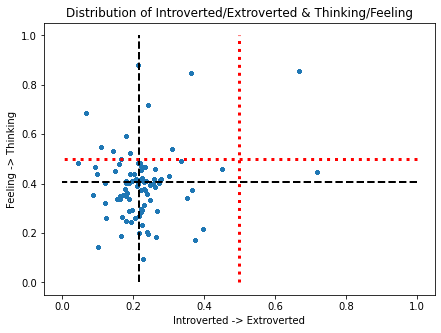

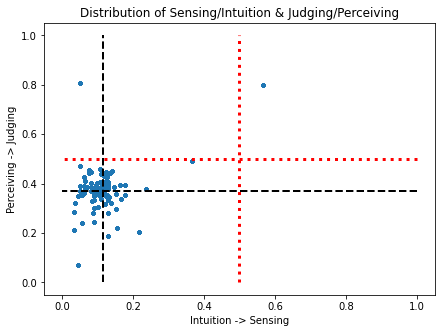

In [38]:
plot = matplotlib.pyplot

# extroverted vs. thinking plot
figure, ax = plot.subplots()
figure.set_size_inches(7, 5)

plot.plot(qnaDataFrame["predictedScoreE"], qnaDataFrame["predictedScoreT"], ".")

# mean location
plot.plot([qnaDataFrame["predictedScoreE"].mean(), qnaDataFrame["predictedScoreE"].mean()],[0,1], "k-", linestyle = "--", lw = 2)
plot.plot([1,0], [qnaDataFrame["predictedScoreT"].mean(), qnaDataFrame["predictedScoreT"].mean()], "k-", linestyle = "--", lw = 2)

# split plot into quads
plot.plot([0.5, 0.5],[0,1], "k-", linestyle = ":", lw = 3, color = "red")
plot.plot([1,0],[0.5, 0.5], "k-", linestyle = ":", lw = 3, color = "red")

ax.set_title("Distribution of Introverted/Extroverted & Thinking/Feeling")
ax.set_xlabel("Introverted -> Extroverted")
ax.set_ylabel("Feeling -> Thinking")

# sensing vs. judging plot
figureB, axB = plot.subplots()
figureB.set_size_inches(7, 5)

plot.plot(qnaDataFrame["predictedScoreS"], qnaDataFrame["predictedScoreJ"], ".")

# mean location
plot.plot([qnaDataFrame["predictedScoreS"].mean(), qnaDataFrame["predictedScoreS"].mean()],[0,1], "k-", linestyle = "--", lw = 2)
plot.plot([1,0], [qnaDataFrame["predictedScoreJ"].mean(), qnaDataFrame["predictedScoreJ"].mean()], "k-", linestyle = "--", lw = 2)

# split plot into quads
plot.plot([0.5, 0.5],[0,1], "k-", linestyle = ":", lw = 3, color = "red")
plot.plot([1,0],[0.5, 0.5], "k-", linestyle = ":", lw = 3, color = "red")

axB.set_title("Distribution of Sensing/Intuition & Judging/Perceiving")
axB.set_xlabel("Intuition -> Sensing")
axB.set_ylabel("Perceiving -> Judging")

plot.show()

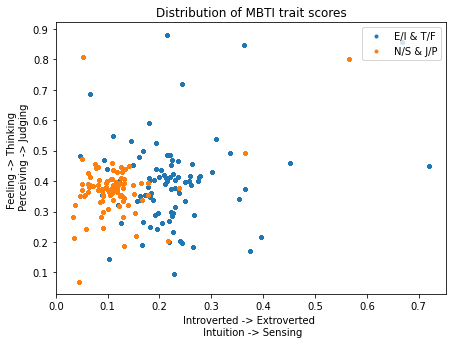

In [41]:
plot = matplotlib.pyplot

figure, ax = plot.subplots()
figure.set_size_inches(7, 5)

plot.plot(qnaDataFrame["predictedScoreE"], qnaDataFrame["predictedScoreT"], ".", label = "E/I & T/F")
plot.plot(qnaDataFrame["predictedScoreS"], qnaDataFrame["predictedScoreJ"], ".", label = "N/S & J/P")
plot.legend(loc = "upper right");

ax.set_title("Distribution of MBTI trait scores")
ax.set_xlabel("Introverted -> Extroverted \n Intuition -> Sensing")
ax.set_ylabel("Feeling -> Thinking \n Perceiving -> Judging")

plot.show()

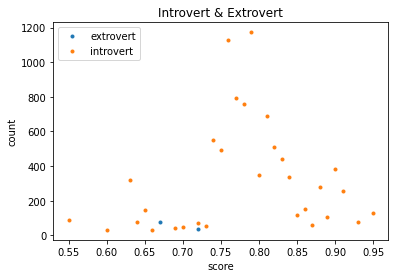

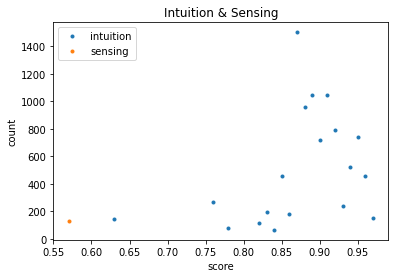

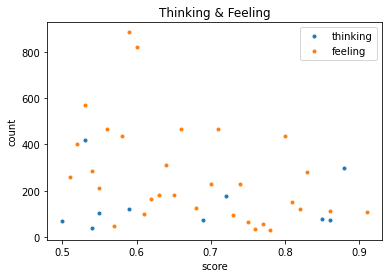

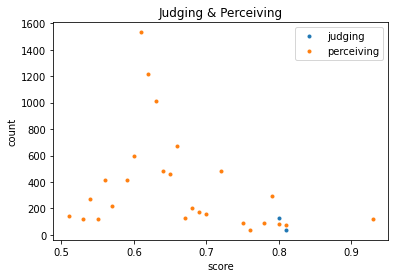

In [42]:
# score along x/bottom (0-1)
# frequency along y/side count

# round up to two decimal places
roundedDataFrame = qnaDataFrame.copy()
roundedDataFrame = roundedDataFrame.round(2)
roundedDataFrame

# E/I

# introvert
iDataFrame = roundedDataFrame[roundedDataFrame['predictedTrait'].str.contains('I')]
groupedByI = iDataFrame.groupby("predictedScoreI").count().filter(items=["predictedScoreI", "Answer"])
groupedByI = groupedByI.reset_index()

# extrovert
eDataFrame = roundedDataFrame[roundedDataFrame['predictedTrait'].str.contains('E')]
groupedByE = eDataFrame.groupby("predictedScoreE").count().filter(items=["predictedScoreE", "Answer"])
groupedByE = groupedByE.reset_index()

# N/S

# intuition (N)
nDataFrame = roundedDataFrame[roundedDataFrame['predictedTraitC'].str.contains('N')]
groupedByN = nDataFrame.groupby("predictedScoreN").count().filter(items=["predictedScoreN", "Answer"])
groupedByN = groupedByN.reset_index()

# sensing
sDataFrame = roundedDataFrame[roundedDataFrame['predictedTraitC'].str.contains('S')]
groupedByS = sDataFrame.groupby("predictedScoreS").count().filter(items=["predictedScoreS", "Answer"])
groupedByS = groupedByS.reset_index()

# T/F

# thinking
tDataFrame = roundedDataFrame[roundedDataFrame['predictedTraitB'].str.contains('T')]
groupedByT = tDataFrame.groupby("predictedScoreT").count().filter(items=["predictedScoreT", "Answer"])
groupedByT = groupedByT.reset_index()

# feeling
fDataFrame = roundedDataFrame[roundedDataFrame['predictedTraitB'].str.contains('F')]
groupedByF = fDataFrame.groupby("predictedScoreF").count().filter(items=["predictedScoreF", "Answer"])
groupedByF = groupedByF.reset_index()

# J/P

# judging
jDataFrame = roundedDataFrame[roundedDataFrame['predictedTraitD'].str.contains('J')]
groupedByJ = jDataFrame.groupby("predictedScoreJ").count().filter(items=["predictedScoreJ", "Answer"])
groupedByJ = groupedByJ.reset_index()

# perceiving
pDataFrame = roundedDataFrame[roundedDataFrame['predictedTraitD'].str.contains('P')]
groupedByP = pDataFrame.groupby("predictedScoreP").count().filter(items=["predictedScoreP", "Answer"])
groupedByP = groupedByP.reset_index()

# ---------
# plot me!

figure, ax = plot.subplots()

# I/E
plot.plot(groupedByE["predictedScoreE"], groupedByE["Answer"], ".", label = "extrovert")
plot.plot(groupedByI["predictedScoreI"], groupedByI["Answer"], ".", label = "introvert")
plot.legend(loc = "upper left");
ax.set_xlabel("score")
ax.set_ylabel("count")
ax.set_title("Introvert & Extrovert")

plot.show()

figure, ax2 = plot.subplots()

# N/S
plot.plot(groupedByN["predictedScoreN"], groupedByN["Answer"], ".", label = "intuition")
plot.plot(groupedByS["predictedScoreS"], groupedByS["Answer"], ".", label = "sensing")
plot.legend(loc = "upper left");
ax2.set_xlabel("score")
ax2.set_ylabel("count")
ax2.set_title("Intuition & Sensing")

plot.show()

figure, ax1 = plot.subplots()

# T/F
plot.plot(groupedByT["predictedScoreT"], groupedByT["Answer"], ".", label = "thinking")
plot.plot(groupedByF["predictedScoreF"], groupedByF["Answer"], ".", label = "feeling")
plot.legend(loc = "upper right");
ax1.set_xlabel("score")
ax1.set_ylabel("count")
ax1.set_title("Thinking & Feeling")

plot.show()

figure, ax3 = plot.subplots()

# J/P
plot.plot(groupedByJ["predictedScoreJ"], groupedByJ["Answer"], ".", label = "judging")
plot.plot(groupedByP["predictedScoreP"], groupedByP["Answer"], ".", label = "perceiving")
plot.legend(loc = "upper right");
ax3.set_xlabel("score")
ax3.set_ylabel("count")
ax3.set_title("Judging & Perceiving")

plot.show()

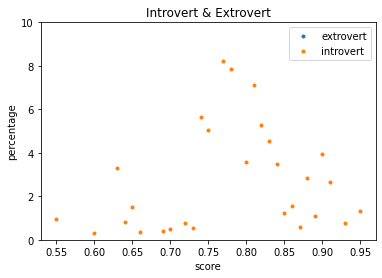

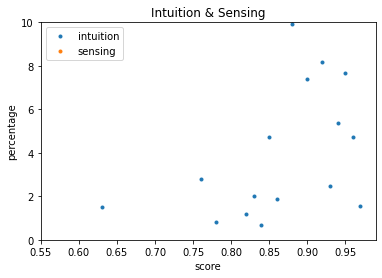

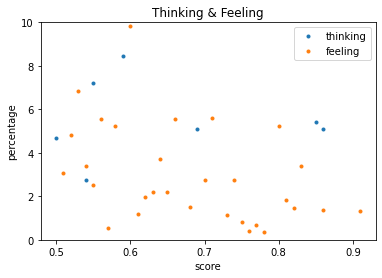

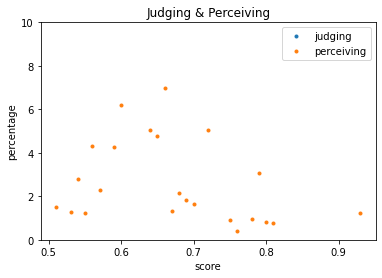

In [44]:
# score along x/bottom (0-1)
# frequency along y/side count

# round up to two decimal places
roundedDataFrame = qnaDataFrame.copy()
roundedDataFrame = roundedDataFrame.round(2)
roundedDataFrame

# E/I

# introvert
iDataFrame = roundedDataFrame[roundedDataFrame['predictedTrait'].str.contains('I')]
groupedByI = iDataFrame.groupby("predictedScoreI").count().filter(items=["predictedScoreI", "Answer"])
groupedByI = groupedByI.reset_index()
percentageI = (groupedByI["Answer"] / groupedByI["Answer"].sum() * 100)


# extrovert
eDataFrame = roundedDataFrame[roundedDataFrame['predictedTrait'].str.contains('E')]
groupedByE = eDataFrame.groupby("predictedScoreE").count().filter(items=["predictedScoreE", "Answer"])
groupedByE = groupedByE.reset_index()
percentageE = (groupedByE["Answer"] / groupedByE["Answer"].sum() * 100)

# N/S

# intuition (N)
nDataFrame = roundedDataFrame[roundedDataFrame['predictedTraitC'].str.contains('N')]
groupedByN = nDataFrame.groupby("predictedScoreN").count().filter(items=["predictedScoreN", "Answer"])
groupedByN = groupedByN.reset_index()
percentageN = (groupedByN["Answer"] / groupedByN["Answer"].sum() * 100)

# sensing
sDataFrame = roundedDataFrame[roundedDataFrame['predictedTraitC'].str.contains('S')]
groupedByS = sDataFrame.groupby("predictedScoreS").count().filter(items=["predictedScoreS", "Answer"])
groupedByS = groupedByS.reset_index()
percentageS = (groupedByS["Answer"] / groupedByS["Answer"].sum() * 100)

# T/F

# thinking
tDataFrame = roundedDataFrame[roundedDataFrame['predictedTraitB'].str.contains('T')]
groupedByT = tDataFrame.groupby("predictedScoreT").count().filter(items=["predictedScoreT", "Answer"])
groupedByT = groupedByT.reset_index()
percentageT = (groupedByT["Answer"] / groupedByT["Answer"].sum() * 100)

# feeling
fDataFrame = roundedDataFrame[roundedDataFrame['predictedTraitB'].str.contains('F')]
groupedByF = fDataFrame.groupby("predictedScoreF").count().filter(items=["predictedScoreF", "Answer"])
groupedByF = groupedByF.reset_index()
percentageF = (groupedByF["Answer"] / groupedByF["Answer"].sum() * 100)

# J/P

# judging
jDataFrame = roundedDataFrame[roundedDataFrame['predictedTraitD'].str.contains('J')]
groupedByJ = jDataFrame.groupby("predictedScoreJ").count().filter(items=["predictedScoreJ", "Answer"])
groupedByJ = groupedByJ.reset_index()
percentageJ = (groupedByJ["Answer"] / groupedByJ["Answer"].sum() * 100)

# perceiving
pDataFrame = roundedDataFrame[roundedDataFrame['predictedTraitD'].str.contains('P')]
groupedByP = pDataFrame.groupby("predictedScoreP").count().filter(items=["predictedScoreP", "Answer"])
groupedByP = groupedByP.reset_index()
percentageP = (groupedByP["Answer"] / groupedByP["Answer"].sum() * 100)

# ---------
# plot me!

figure, ax = plot.subplots()

# I/E
plot.plot(groupedByE["predictedScoreE"], percentageE, ".", label = "extrovert")
plot.plot(groupedByI["predictedScoreI"], percentageI, ".", label = "introvert")
plot.legend(loc = "upper right");
ax.set_xlabel("score")
ax.set_ylabel("percentage")
ax.set_title("Introvert & Extrovert")

plot.ylim(0, 10)
plot.show()

figure, ax2 = plot.subplots()

# N/S
plot.plot(groupedByN["predictedScoreN"], percentageN, ".", label = "intuition")
plot.plot(groupedByS["predictedScoreS"], percentageS, ".", label = "sensing")
plot.legend(loc = "upper left");
ax2.set_xlabel("score")
ax2.set_ylabel("percentage")
ax2.set_title("Intuition & Sensing")

plot.ylim(0, 10)
plot.show()

figure, ax1 = plot.subplots()

# T/F
plot.plot(groupedByT["predictedScoreT"], percentageT, ".", label = "thinking")
plot.plot(groupedByF["predictedScoreF"], percentageF, ".", label = "feeling")
plot.legend(loc = "upper right");
ax1.set_xlabel("score")
ax1.set_ylabel("percentage")
ax1.set_title("Thinking & Feeling")

plot.ylim(0, 10)
plot.show()

figure, ax3 = plot.subplots()

# J/P
plot.plot(groupedByJ["predictedScoreJ"], percentageJ, ".", label = "judging")
plot.plot(groupedByP["predictedScoreP"], percentageP, ".", label = "perceiving")
plot.legend(loc = "upper right");
ax3.set_xlabel("score")
ax3.set_ylabel("percentage")
ax3.set_title("Judging & Perceiving")

plot.ylim(0, 10)
plot.show()